# Sistemas Computacionais e Reconhecimento de Imagens

## Aula 1 (Processamento de Imagens Digitais)
1. Introdução
  - Conceitos básicos de uma imagem digital
    - Etapas do Processamento de Imagens Digitais
    - Modelo de uma imagem digital
    - Exemplos de aplicações
2. Fundamentos de imagens digitais
  - Representação
    - Domínio espacial, espaço de cor (RGB), pixels e valor de intensidade
  - Relações básicas entre pixels
    - Vizinhança 
    - Interpolação 
    - Conectividade
    - Regiões
    - Fronteiras
    - Segmentação
    - Medidas de distância
  - Operações matemáticas básicas utilizadas
    - Operações aritméticas


# Introdução
## Etapas do Processamento de Imagens Digitais
![](images/steps.png)


# Introdução
## Modelo de uma imagem digital
![](images/lena_f.png)

# Introdução
## Exemplos de aplicações
 - ### Imagem de raios gama
 - ### Imagem de raio x
 - ### Imagem em ultra-violeta
 - ### Imagem infravermelha
 - ### Imagem em banda de mircoondas
 - ### Imagem em banda de radio

# Fundamentos de imagens digitais
## Representação
 - ### Domínio espacial, espaço de cor (RGB), pixels e valor de intensidade

In [1]:
# Instalando e importando bibliotecas

# !pip3 install opencv-python
# !pip3 install matplotlib
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

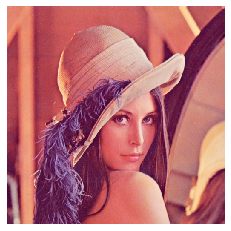

In [2]:
# Lendo imagem

img = cv2.imread('images/lena.png')
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(rgb_img)

In [3]:
# valores de intensidade dos pixels da imagem

R = pd.DataFrame(rgb_img[0])
G = pd.DataFrame(rgb_img[1]) 
B = pd.DataFrame(rgb_img[1]) 

R.columns = pd.MultiIndex.from_product([['R'], R.columns])
G.columns = pd.MultiIndex.from_product([['G'], G.columns])
B.columns = pd.MultiIndex.from_product([['B'], B.columns])
pd.concat([R, G, B], axis = 1)

R              G              B          
       0    1    2    0    1    2    0    1    2
0    226  137  125  226  137  125  226  137  125
1    226  137  125  226  137  125  226  137  125
2    223  137  133  223  137  133  223  137  133
3    223  136  128  223  136  128  223  136  128
4    226  138  120  226  138  120  226  138  120
5    226  129  116  226  129  116  226  129  116
6    228  138  123  228  138  123  228  138  123
7    227  134  124  227  134  124  227  134  124
8    227  140  127  227  140  127  227  140  127
9    225  136  119  225  136  119  225  136  119
10   228  135  126  228  135  126  228  135  126
11   225  134  121  225  134  121  225  134  121
12   223  130  108  223  130  108  223  130  108
13   226  139  119  226  139  119  226  139  119
14   223  135  120  223  135  120  223  135  120
15   221  129  114  221  129  114  221  129  114
16   221  134  108  221  134  108  221  134  108
17   221  131  113  221  131  113  221  131  113
18   222  138  121  222  138  121  222  138  121
19   222  139  114  222  139  114  222  139  114
20   223  127  109  223  127  109  223  127  109
21   223  132  105  223  132  105  223  132  105
22   224  129  102  224  129  102  224  129  102
23   221  134  109  221  134  109  221  134  109
24   218  131  110  218  131  110  218  131  110
25   221  133  113  221  133  113  221  133  113
26   223  130  108  223  130  108  223  130  108
27   225  125   98  225  125   98  225  125   98
28   221  130  121  221  130  121  221  130  121
29   221  129  111  221  129  111  221  129  111
..   ...  ...  ...  ...  ...  ...  ...  ...  ...
482  194   97  100  194   97  100  194   97  100
483  195   96   97  195   96   97  195   96   97
484  196   95  100  196   95  100  196   95  100
485  196  101  108  196  101  108  196  101  108
486  192   95   91  192   95   91  192   95   91
487  194   97  101  194   97  101  194   97  101
488  199   93   93  199   93   93  199   93   93
489  196   89   89  196   89   89  196   89   89
490  196  101  100  196  101  100  196  101  100
491  193   95   96  193   95   96  193   95   96
492  197   97   86  197   97   86  197   97   86
493  194   97  105  194   97  105  194   97  105
494  192   88   90  192   88   90  192   88   90
495  190   94   96  190   94   96  190   94   96
496  185   82   93  185   82   93  185   82   93
497  191   91   91  191   91   91  191   91   91
498  188   84   88  188   84   88  188   84   88
499  189   88   96  189   88   96  189   88   96
500  187   89   89  187   89   89  187   89   89
501  186   84   90  186   84   90  186   84   90
502  185   91  102  185   91  102  185   91  102
503  196   93   94  196   93   94  196   93   94
504  211  107  104  211  107  104  211  107  104
505  224  139  131  224  139  131  224  139  131
506  229  144  129  229  144  129  229  144  129
507  231  147  126  231  147  126  231  147  126
508  234  149  123  234  149  123  234  149  123
509  230  148  122  230  148  122  230  148  122
510  221  130  110  221  130  110  221  130  110
511  200   99   90  200   99   90  200   99   90

[512 rows x 9 columns]

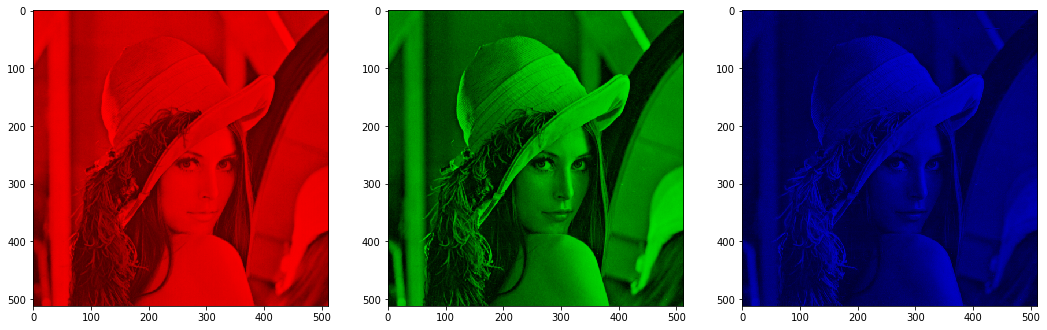

In [4]:
# imagens separadas por canal

red = rgb_img.copy()
red[:, :, 1] = 0
red[:, :, 2] = 0

green = rgb_img.copy()
green[:, :, 0] = 0
green[:, :, 2] = 0

blue = rgb_img.copy()
blue[:, :, 0] = 0
blue[:, :, 1] = 0

imgs = [red, green, blue]

fig = plt.figure()
for n, img in enumerate(imgs):
    fig.add_subplot(1, np.ceil(len(imgs)/float(1)), n + 1)
    plt.imshow(img)

fig.set_size_inches(np.array(fig.get_size_inches()) * len(imgs))
plt.show()

# Fundamentos de imagens digitais
## Relações básicas entre pixels
 - ### Vizinhança
    - #### Um pixel na coordenada `(x, y)` tem quatro vizinhos sendo horizontais e verticais cujas coordenadas são dadas por:
    `(x+1, y), (x-1, y), (x, y+1), (x, y-1)`
    
    ![](images/vizinhanca.jpg)

# Fundamentos de imagens digitais
## Relações básicas entre pixels
  - ### Interpolação
    - ### Sempre que ampliamos ou reduzimos uma imagem estamos trabalhando com interpolação 
    - ### Interpolação de imagens digitais é basicamente criar novos pixels a partir dos pixels já existentes.
    - ### Exemplo:
      - #### Interpolação Bilinear: 
      `g(u0) e g(u0+1), sendo u0=[x]`
    
      - #### O peso de cada ponto é proporcional à proximidade da posição continua x
      `ĝ(x)=g(u0)+(x-u0)*(g(u0+1)-g(u0)) = g(u0)*(1-(x-u0))+g(u0+1)*(x-u0)`
    

  ![](images/bilinear.png)

In [5]:
R = pd.DataFrame(red[0])
G = pd.DataFrame(green[0]) 
B = pd.DataFrame(blue[0]) 

R.columns = pd.MultiIndex.from_product([['R'], R.columns])
G.columns = pd.MultiIndex.from_product([['G'], G.columns])
B.columns = pd.MultiIndex.from_product([['B'], B.columns])
df_green = pd.concat([R, G, B], axis = 1)
df_green

R        G          B        
       0  1  2  0    1  2  0  1    2
0    226  0  0  0  137  0  0  0  125
1    226  0  0  0  137  0  0  0  125
2    223  0  0  0  137  0  0  0  133
3    223  0  0  0  136  0  0  0  128
4    226  0  0  0  138  0  0  0  120
5    226  0  0  0  129  0  0  0  116
6    228  0  0  0  138  0  0  0  123
7    227  0  0  0  134  0  0  0  124
8    227  0  0  0  140  0  0  0  127
9    225  0  0  0  136  0  0  0  119
10   228  0  0  0  135  0  0  0  126
11   225  0  0  0  134  0  0  0  121
12   223  0  0  0  130  0  0  0  108
13   226  0  0  0  139  0  0  0  119
14   223  0  0  0  135  0  0  0  120
15   221  0  0  0  129  0  0  0  114
16   221  0  0  0  134  0  0  0  108
17   221  0  0  0  131  0  0  0  113
18   222  0  0  0  138  0  0  0  121
19   222  0  0  0  139  0  0  0  114
20   223  0  0  0  127  0  0  0  109
21   223  0  0  0  132  0  0  0  105
22   224  0  0  0  129  0  0  0  102
23   221  0  0  0  134  0  0  0  109
24   218  0  0  0  131  0  0  0  110
25   221  0  0  0  133  0  0  0  113
26   223  0  0  0  130  0  0  0  108
27   225  0  0  0  125  0  0  0   98
28   221  0  0  0  130  0  0  0  121
29   221  0  0  0  129  0  0  0  111
..   ... .. .. ..  ... .. .. ..  ...
482  194  0  0  0   97  0  0  0  100
483  195  0  0  0   96  0  0  0   97
484  196  0  0  0   95  0  0  0  100
485  196  0  0  0  101  0  0  0  108
486  192  0  0  0   95  0  0  0   91
487  194  0  0  0   97  0  0  0  101
488  199  0  0  0   93  0  0  0   93
489  196  0  0  0   89  0  0  0   89
490  196  0  0  0  101  0  0  0  100
491  193  0  0  0   95  0  0  0   96
492  197  0  0  0   97  0  0  0   86
493  194  0  0  0   97  0  0  0  105
494  192  0  0  0   88  0  0  0   90
495  190  0  0  0   94  0  0  0   96
496  185  0  0  0   82  0  0  0   93
497  191  0  0  0   91  0  0  0   91
498  188  0  0  0   84  0  0  0   88
499  189  0  0  0   88  0  0  0   96
500  187  0  0  0   89  0  0  0   89
501  186  0  0  0   84  0  0  0   90
502  185  0  0  0   91  0  0  0  102
503  196  0  0  0   93  0  0  0   94
504  211  0  0  0  107  0  0  0  104
505  224  0  0  0  139  0  0  0  131
506  229  0  0  0  144  0  0  0  129
507  231  0  0  0  147  0  0  0  126
508  234  0  0  0  149  0  0  0  123
509  230  0  0  0  148  0  0  0  122
510  221  0  0  0  130  0  0  0  110
511  200  0  0  0   99  0  0  0   90

[512 rows x 9 columns]

In [6]:
rgb_img_resized = cv2.resize(rgb_img, (24, 24), interpolation=cv2.INTER_LINEAR)

print("img original: " + str(rgb_img.shape))
print("img redimensionada: " + str(rgb_img_resized.shape))

R = pd.DataFrame(rgb_img_resized[0])
G = pd.DataFrame(rgb_img_resized[1]) 
B = pd.DataFrame(rgb_img_resized[1]) 

R.columns = pd.MultiIndex.from_product([['R'], R.columns])
G.columns = pd.MultiIndex.from_product([['G'], G.columns])
B.columns = pd.MultiIndex.from_product([['B'], B.columns])
pd.concat([R, G, B], axis = 1)

img original: (512, 512, 3)
img redimensionada: (24, 24, 3)


R              G              B          
      0    1    2    0    1    2    0    1    2
0   226  131  110  231  132  101  231  132  101
1   224  129   99  233  149  120  233  149  120
2   232  140  106  230  137  109  230  137  109
3   171   64   82  170   62   79  170   62   79
4   178   69   76  178   71   79  178   71   79
5   196   93  100  197   89   91  197   89   91
6   204   99   97  207   97   96  207   97   96
7   208   96   89  208   98  100  208   98  100
8   207   98   95  210  102  103  210  102  103
9   211  100   95  210   98   95  210   98   95
10  203   98   94  204   93   91  204   93   91
11  208  101  102  205   96  100  205   96  100
12  205   98   94  201   93   93  201   93   93
13  199   95   96  201   93   95  201   93   95
14  187   86   94  198   90   96  198   90   96
15  210  108  104  185   91   98  185   91   98
16  223  127  107  225  135  118  225  135  118
17  223  128  105  226  131  105  226  131  105
18  219  131  107  224  130  109  224  130  109
19  250  210  156  210  114   79  210  114   79
20  178   81   88  233  180  142  233  180  142
21  187   91   91  190   91   89  190   91   89
22  195   92   90  165   68   88  165   68   88
23  173   75   80  101   25   62  101   25   62

# Fundamentos de imagens digitais
## Relações básicas entre pixels
 - ### Conectividade: A conectividade entre pixels estabelece quando estes estão conectados, quando possuem a mesma propriedade para pertencer à mesma região

 ![](images/conectividade.jpg)

# Fundamentos de imagens digitais
## Relações básicas entre pixels
 - ### Regiões: Um grupo de pixels conectados com propriedades similares

 ![](images/region.jpg)

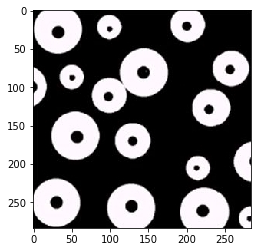

In [7]:
# exemplo preenchimento

img = cv2.imread('images/region_original.jpg')
plt.imshow(img)

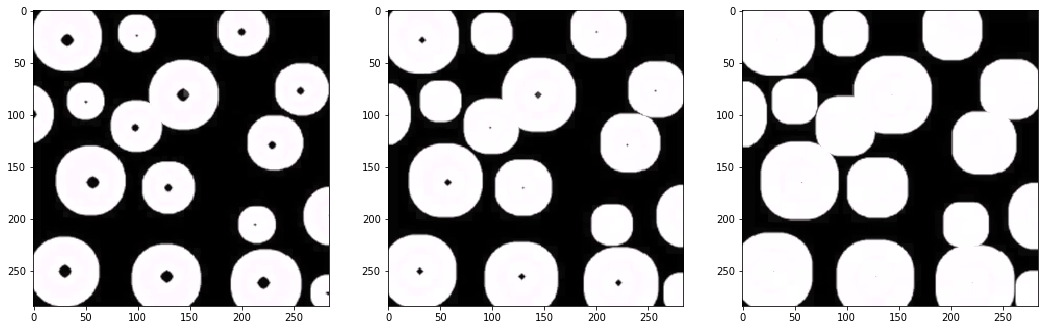

In [8]:
kernel = np.ones((5,5), np.uint8) 
img_dilation_1 = cv2.dilate(img, kernel, iterations=1) 
img_dilation_2 = cv2.dilate(img, kernel, iterations=2) 
img_dilation_3 = cv2.dilate(img, kernel, iterations=3) 

imgs = [img_dilation_1, img_dilation_2, img_dilation_3]

fig = plt.figure()
for n, img in enumerate(imgs):
    fig.add_subplot(1, np.ceil(len(imgs)/float(1)), n + 1)
    plt.imshow(img)

fig.set_size_inches(np.array(fig.get_size_inches()) * len(imgs))
plt.show()

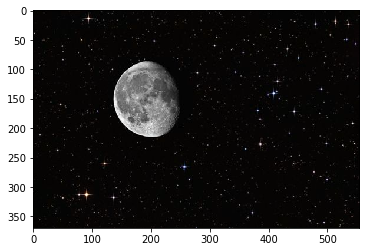

In [9]:
# exemplo remoção de estrelas 

img = cv2.imread('images/moon.jpg')

plt.imshow(img)

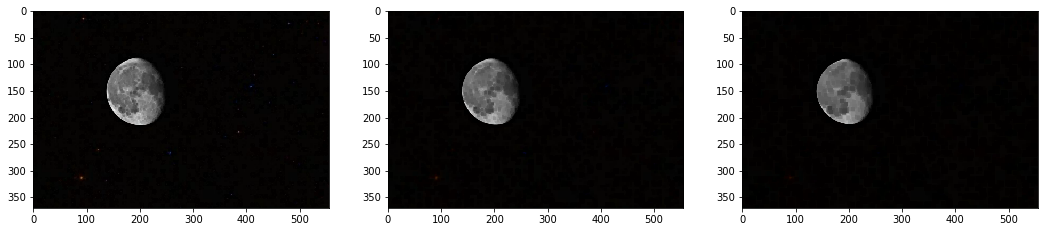

In [10]:
img = cv2.imread('images/moon.jpg')
kernel = np.ones((3,3), np.uint8) 
img_erosion_1 = cv2.erode(img, kernel, iterations=1) 
img_erosion_2 = cv2.erode(img, kernel, iterations=2) 
img_erosion_3 = cv2.erode(img, kernel, iterations=3) 

imgs = [img_erosion_1, img_erosion_2, img_erosion_3]

fig = plt.figure()
for n, img in enumerate(imgs):
    fig.add_subplot(1, np.ceil(len(imgs)/float(1)), n + 1)
    plt.imshow(img)

fig.set_size_inches(np.array(fig.get_size_inches()) * len(imgs))
plt.show()

# Fundamentos de imagens digitais
## Relações básicas entre pixels
 - ### Fronteira (borda ou contorno): É o cunjunto de pixels que representa a borda de uma região

 ![](images/fronteira.jpg)

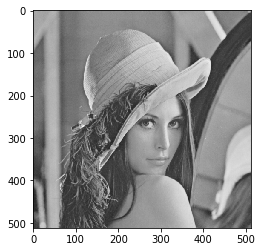

In [11]:
# detecção de fronteira 

img = cv2.imread('images/lena.png', 0)
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_img)

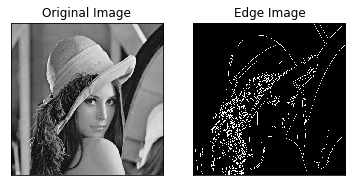

In [12]:
edges = cv2.Canny(rgb_img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

# Fundamentos de imagens digitais
## Relações básicas entre pixels
 - ### Segmentação: processo de dividir uma imagem em múltiplas regiões (conjunto de pixels) ou objetos

 ![](images/segmentacao.jpg)

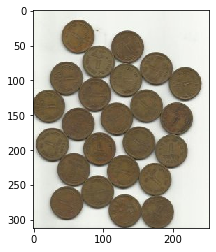

In [13]:
# exemplo segmentação de moedas

img = cv2.imread('images/coins.jpg')
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)

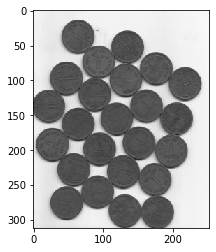

In [14]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray_to_show = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)
plt.imshow(gray_to_show)

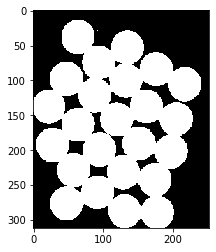

In [15]:
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
thresh_to_show = cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB)
plt.imshow(thresh_to_show)

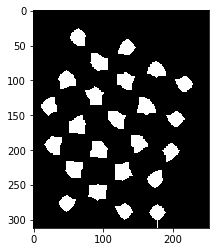

In [16]:
kernel = np.ones((3,3), np.uint8) 
thresh_eroded = cv2.erode(thresh, kernel, iterations=10)
thresh_eroded_to_show = cv2.cvtColor(thresh_eroded, cv2.COLOR_BGR2RGB)

plt.imshow(thresh_eroded_to_show)

In [17]:
contours,h = cv2.findContours(thresh_eroded,1,2)

len(contours)

24

# Fundamentos de imagens digitais
## Relações básicas entre pixels
 - ### Medidas de distância: Similaridade entre pixels
 - ### Distância Euclidiana
 
 ![](images/distancia_euclidiana.jpg)



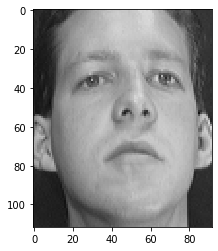

In [18]:
# exemplos comparação de faces simples

img_to_search = cv2.imread('images/face/N001_9.pgm')
plt.imshow(img_to_search)

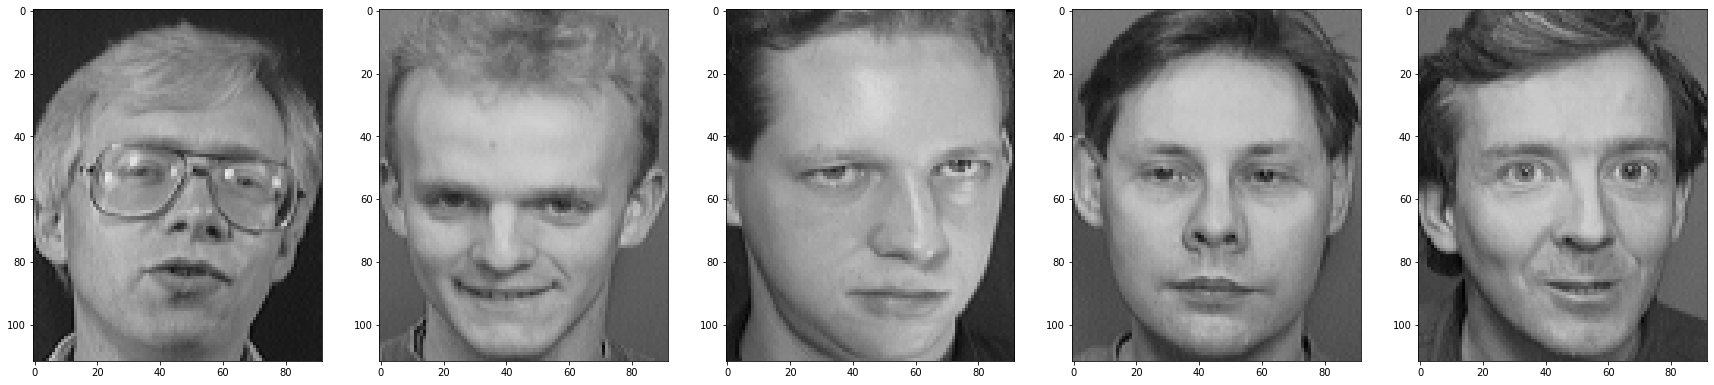

In [19]:
import os

face_imgs = []

directory = 'images/face/'

for filename in os.listdir(directory):
    if filename != "N001_9.pgm":
        face_imgs.append(cv2.imread(directory + filename))

fig = plt.figure()
for n, img in enumerate(face_imgs):
    fig.add_subplot(1, np.ceil(len(face_imgs)/float(1)), n + 1)
    plt.imshow(img)

fig.set_size_inches(np.array(fig.get_size_inches()) * len(face_imgs))
plt.show()

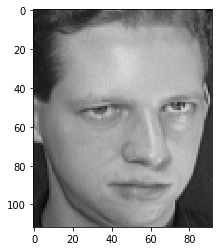

In [20]:
min_dist = float('inf')

for img in face_imgs:
    dist = cv2.norm(img, img_to_search, cv2.NORM_L2)
    if dist < min_dist:
        min_dist = dist
        img_target = img

plt.imshow(img_target)

# Fundamentos de imagens digitais
## Operações matemáticas básicas utilizadas
 - ### Operações aritméticas

| Operação      	| Efeito sobre a imagem                                                                                                                                                                            	| Aplicação                                               	|
|---------------	|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------	|---------------------------------------------------------	|
| Adição        	| Z é o resultado da soma dos valores de intensidade de X e Y. Se Y for um escalar positivo, Z será uma versão mais clara de X; o acréscimo de intensidade será o próprio valor de Y.              	| Normalização de brilho de imagens  Remoção de ruídos    	|
| Subtração     	| Z é o resultado da diferença dos valores de intensidade de X e Y. Se Y for um escalar positivo, Z será uma versão mais escura de X; o decréscimo de intensidade será o próprio valor de Y.       	| Detecção de diferenças entre duas imagens da mesma cena 	|
| Divisão       	| Z é a razão dos valores de intensidade de X pelos valores correspondentes em Y. Se Y for um escalar positivo, os valores de intensidade de Z serão inversamente proporcionais a X por um fator Y 	| Normalização do brilho                                  	|
| Multiplicação 	| Z é o produto dos valores de intensidade de X e Y. Se Y for um escalar positivo, os valores de intensidade de Z serão diretamente proporcionais a X por um fator Y.                              	| Calibração de brilho                                    	|

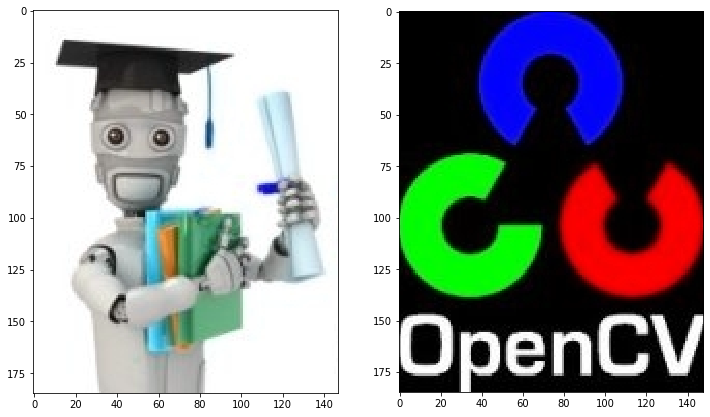

In [21]:
# exemplo adicionando uma marca dagua

robot = cv2.imread('images/robot.jpg')
opencv_logo = cv2.imread('images/opencv_logo.jpg')

imgs = [robot, opencv_logo]

fig = plt.figure()
for n, img in enumerate(imgs):
    fig.add_subplot(1, np.ceil(len(imgs)/float(1)), n + 1)
    plt.imshow(img)

fig.set_size_inches(np.array(fig.get_size_inches()) * len(imgs))
plt.show()

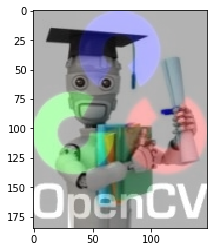

In [22]:
robot = cv2.resize(robot, (opencv_logo.shape[1],opencv_logo.shape[0]), fx=0.5, fy=0.5) 

dst = cv2.addWeighted(robot,0.7,opencv_logo,0.3,0)

plt.imshow(dst)